# Проект по анализу игровых платформ

Описание проекта:
На основе исторических данных из открытых источников о продажах игр, оценки пользователей и экспертов, жанров и платформ необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании..

Цель проекта: 
Выявить определяющие успешность игры закономерности.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
#from google.colab import drive - я закомментил эти строки - для избежания ошибки
#drive.mount('/content/gdrive')
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter('ignore') #для игнорирования ошибок
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# 1. Изучаем данные

In [2]:
df=pd.read_csv('/datasets/games.csv')
display(df.head(5))
display(df.info())
display(df.isna().sum()) #изучаем пропуски

display(df['Rating'].value_counts()) #считаем количество игр по каждому типу возрастного рейтинга

display(df['User_Score'].value_counts()) #обнаруживаем рейтинг "tdr"

column_name = ['Name',	'Platform',	'Year_of_Release',	'Genre',	'User_Score',	'Rating'] #изучаем интересующие столбцы на уникальные значения
for i in column_name:
    print('Уникальные значения столбца',i)
    display(df[i].unique())  

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.5       2
0.2       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

Уникальные значения столбца Name


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Уникальные значения столбца Platform


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Уникальные значения столбца Year_of_Release


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Уникальные значения столбца Genre


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Уникальные значения столбца User_Score


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Уникальные значения столбца Rating


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

# Ошибки:

- Пропуски в столбце Name. Всего два, не ясно, о какой игре идет речь. Удаляем.

- Пропуски в столбце Genre. Всего два. Удаляем.

- Пропуски в столбце "Year_of_Release" - 269 шт., это 1,6% датафрейма. Количество незначительно, но оно может повлиять на исследование, если заполнять средним или медиальным значением. Для отдельного года это может даль смещение. Заполним нулями и не будем использовать при исследовании года выпуска. Можно преобразовать столбец в тип DateTame, но нет уверенности, что это поможет исследованию, так как в столбце только год и с ним можно провести все необходимые арифметические действия.

- Пропуски в столбцах Critic_Score - 8578 шт. и User_Score - 6701 шт., говорят, что эти игры не были оценены критиками/пользователями. Использовать эти игры в исследованиях по данным столбцам нет смысла. Так же в столбце User_Score есть значения "tbd" - "To Be Determined" - рейтинг на стадии определения, 2424 значения. Все заменяем на 0 и будем исключать в процессе исследования.

- Пропуски в столбце Rating. Речь идет о возрастном рейтинге ESRB. Система рейтинга была запущена только в 1994 году, играм до этого времени рейтинг присвоен не был. Этим пропускам можно присвоить рейтинг RP (рейтинг ожидается) и не использовать в исследовании. Игр с рейтингом «EC» («Early childhood») — «Для детей младшего возраста», K-A ("EC" до 1999 года) и «AO» («Adults Only 18+») — «Только для взрослых» в сумме очень мало, 0.06% датафрейма. Их так же нет смысла использовать в исследовании рейтинга. Пока оставим, возможно удалим позже исходя из задачи. Преобразуем рейтинг "K-A" в "EC".

Смена типов данных:

- Year_of_Release преобразуем в int.

- Значения столбцов NA_sales,	EU_sales,	JP_sales,	Other_sales вписаны в млн. шт.. Для перевода в int можно сначала преобразовать в единицы (Прим: 2,1 млн = 2 100000). Если данных слишком мног0, можно преобразовать в тысячи (Прим: 2,1 млн = 21000 тыс.).

- Critic_Score переводим в int 

- User_Score переводим в float. Можно домножить на 10 и перевести в int, для удобства сравнения с Critic_Score, но это нарушит "систему исчисления" данного рейтинга по 10-бальной шкале. Сделаем, если понадобится далее для анализа и сравнения.




# 2. Подготавливаем данные

In [3]:
df = df.rename(str.lower, axis='columns') #приводим название колонок к нижнему регистру

df = df.dropna(subset = ['name','genre',]) #удаляем игры без названия и жанра

df['user_score'].loc[df['user_score'] == 'tbd'] = 0 #заменяем отсуствующую оценку пользователями "tdr" на "0"
df['rating'].loc[df['rating'] == 'K-A'] = 'EC' #заменяем возрастной рейтинг "K-A" на "EC"

df.fillna({'year_of_release':'0', 'critic_score':'0', 'user_score':'0', 'rating':'RP'}, inplace=True) #заполняем пропуски

df = df.astype({"year_of_release": int, "critic_score": int, "user_score": np.float}) #изменяем тип данных

col = ['na_sales','eu_sales', 'jp_sales', 'other_sales'] #преобразуем рейтинги через цикл, и изменяем тип данных на int
for i in col:
    df[i] = (df[i]*1000000).astype(int)

df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #создаем столбец с суммарными продажами

display(df.head(3))
display(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76,8.0,E,82540000
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,770000,0,0.0,RP,40240000
2,Mario Kart Wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82,8.3,E,35520000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  int64  
 5   eu_sales         16713 non-null  int64  
 6   jp_sales         16713 non-null  int64  
 7   other_sales      16713 non-null  int64  
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  sum_sales        16713 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.7+ MB


None

# 3. Исследуем данные
  
#  3.1 Определяем период исследования




Text(0.5, 1.0, 'Количество выпущеных игр по годам')

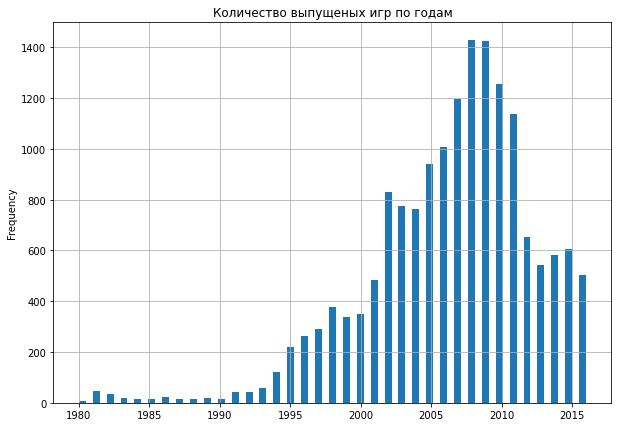

In [4]:
df[df['year_of_release'] != 0]['year_of_release'].plot(kind='hist', bins=73, figsize=(10,7),grid=True)
plt.title('Количество выпущеных игр по годам')

# Вывод:
Для построения прогноза на 2017 год лучше выбрать период стабильной стагнации с 2012 до 2016 года. Это отсеет значительное количество не актуальных платформ и даст информацию, соответствующую времени.

# 3.2 Выбираем платформы с наибольшими суммарными продажами и строим распределение по годам.

,sum
platform,
PS2,1255769992
X360,971419999
PS3,939649995
Wii,907509997
DS,806120000
PS,730859994
GBA,317849999
PS4,314139997
PSP,294050000


Text(0.5, 1.0, 'Выпуск игр PS2, X360, PS3 по годам')

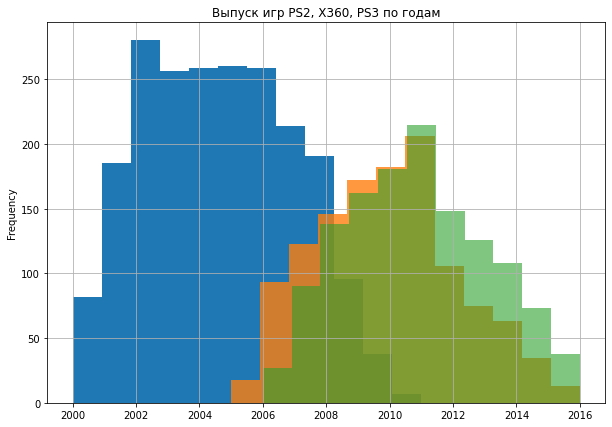

In [5]:
platform_sum_sales = df.pivot_table(index = 'platform', values = 'sum_sales', aggfunc=['sum'])
platform_sum_sales.columns = ['sum']
display(platform_sum_sales.sort_values('sum', ascending = False).head(10))

df[(df['platform'] == 'PS2') & (df['year_of_release'] != 0)]['year_of_release'].plot(kind='hist', bins=12, figsize=(10,7),grid=True)
df[(df['platform'] == 'X360') & (df['year_of_release'] != 0)]['year_of_release'].plot(kind='hist', bins=12, figsize=(10,7),grid=True, alpha=0.8)
df[(df['platform'] == 'PS3') & (df['year_of_release'] != 0)]['year_of_release'].plot(kind='hist', bins=11, figsize=(10,7),grid=True, alpha=0.6)

plt.title('Выпуск игр PS2, X360, PS3 по годам')


# Вывод:

Интервал жизни и поддержки платформы составляем в среднем 10 лет.

# 3.3 Отфильтруем платформы, поддерживаемые в период с 2012 по 2016 года и оценим динамику продаж.

In [6]:
df_new = df.query('year_of_release > 2011') 
platform_new = df_new.pivot_table(index = 'platform', values = 'sum_sales', aggfunc=['sum'])
platform_new.columns = ['sum']
display(platform_new.sort_values('sum', ascending = False))

,sum
platform,
PS4,314139997
PS3,288789998
X360,236540000
3DS,194609999
XOne,159319999
WiiU,82190000
PC,62650000
PSV,49180000
Wii,35370000


# Посмотрим на актиуальные платформы, которые поддерживаются в 2016 году

In [7]:
df_2016 = df.query('year_of_release == 2016')
platform_2016 = df_2016.pivot_table(index = 'platform', values = 'sum_sales', aggfunc=['sum'])
platform_2016.columns = ['sum']
display(platform_2016.sort_values('sum', ascending = False))

,sum
platform,
PS4,69250000
XOne,26149999
3DS,15140000
PC,5250000
WiiU,4600000
PSV,4250000
PS3,3600000
X360,1520000
Wii,180000


<AxesSubplot:xlabel='year_of_release'>

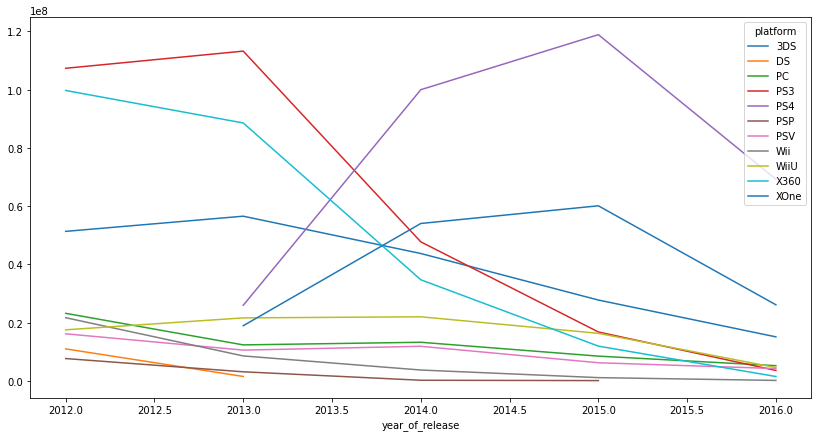

In [8]:
df_new.pivot_table(index="year_of_release", columns="platform", values="sum_sales", aggfunc="sum").plot(figsize=(14,7))

# Вывод

- Самыми перспективными платформами для продажи можно считать PS4, XOne, два конкурирующих гиганта имеют в перспективе рост продаж в среднем в течение 5 лет. 

- Персональные компьютеры (PC) выбиваются из тенденции "поддержка в течение 5 лет", продажи по ним стабильно высокие в весь период исследования. Так как персональные компьютеры не продаются готовым продуктом, как консоль, а модульно собираются и обновляются пользователями, эта платформа актуальна постоянно. 

- Так же отдельно стоит обратить внимание на рынок мини консолей WiiU и PSV, объем продаж по ним ниже, но это отдельный перспективный рынок.

# 3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

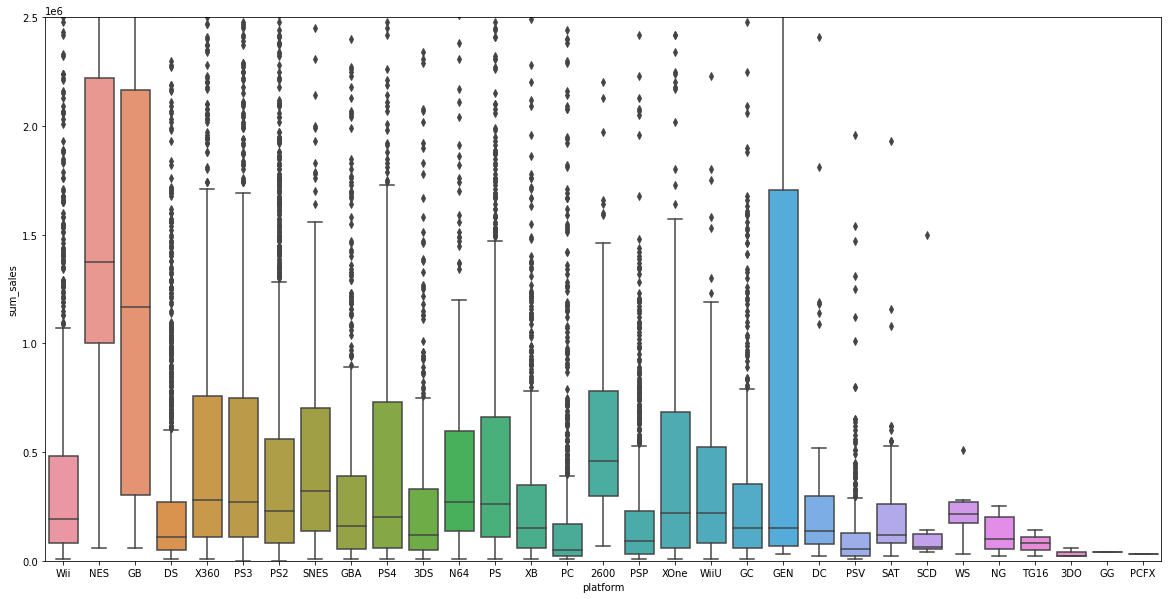

In [9]:
plt.figure(figsize=(20,10))
plt.ylim(0,2500000)
sns.boxplot(x='platform',y='sum_sales',data=df)

# Вывод:

- Самые большие межквартильный размах и медиана у платформ NES (в РФ - приставка Dendy) и GB (GameBoy). Так же высокий межквартильный размах у платформы GEN (Sega Mega Drive). Все три платформы уже не поддерживаются, но к их показателям стоит стремится при планировании продаж.

- У всех платформ диаграмма скошена вправо и имеется большое количество выбросов вправо. Вероятно из-за тендеции, что игры имеют свойство "вируситься" и топовые игры покупают себе большинство пользователей платформы.

- Было бы интересно оценить статистику, сколько игр за время пользования платформой в среднем покупает каждый пользователь.

- В остальном межквартальный размах у большинства платформ находятся в интервале 100 000 - 700 000, медиана 250 000 - 300 000. 

- Не верным будет проводить параллель между платформами, поддержка которых завершена и поддерживаемыми на 2016 год. PS4, XOne по межквартальному размаху и медиане сравнимы с другими платформами, но эти продажи они набрали за 5 лет из 10, а значит имеют перспективу вырасти еще вдвое.

# 3.5 Оценим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков.

Коэффициент корреляции рейтинга критиков от суммарных продаж 0.407


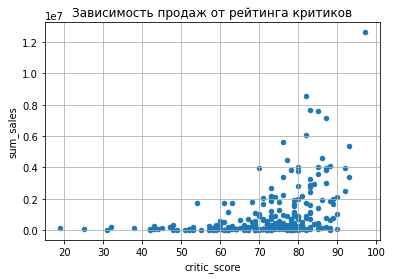

In [10]:
df_ps4_critic = df.query('platform=="PS4" and critic_score !=0')
df_ps4_critic.plot(kind='scatter', x='critic_score', y='sum_sales',grid=True, title = 'Зависимость продаж от рейтинга критиков')
print('Коэффициент корреляции рейтинга критиков от суммарных продаж', df_ps4_critic['critic_score'].corr(df_ps4_critic['sum_sales']).round(3))

Коэффициент корреляции рейтинга пользователей от суммарных продаж -0.034


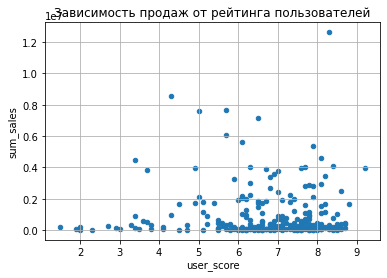

In [11]:
df_ps4_user = df.query('platform=="PS4" and user_score !=0')
df_ps4_user.plot(kind='scatter', x='user_score', y='sum_sales',grid=True, title ='Зависимость продаж от рейтинга пользователей')
print('Коэффициент корреляции рейтинга пользователей от суммарных продаж', df_ps4_user['user_score'].corr(df_ps4_critic['sum_sales']).round(3))

# Вывод:

- Коэффициаент корреляции между рейтингом критиков и суммарными продажами положительный, но низкий, 0.407. Между рейтингом пользователей и продажами практически нулевой и даже отрицательный, -0.034.

- Вероятно на факт продажи влияют другие показатели: реклама, доверие к компании производителю, пристрастие к жанру итп. Есть тенденция о недоверии к любым оценкам в связи с их обильной "покупкой" и "накруткой".

- Так же вероятно, что игры покупаются в основном по предзаказу либо непосредственно после выпуска и принимают решение о продаже не по рейтингу игры, а по подготовительным мероприятиям: рекламе и промо компаниям.

- Критикам игра достается раньше, чем пользователям, что по сути является промо акцией. И на данные рейтинга пользователи успевают опереться до покупки.

- Хочешь продать игру - занимайся прогревом и промо акциями.




# 3.6 Рассмотрим общее распределение игр по жанрам

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: sum_sales, dtype: int64

<AxesSubplot:title={'center':'Распределение игр по жанрам'}, xlabel='genre'>

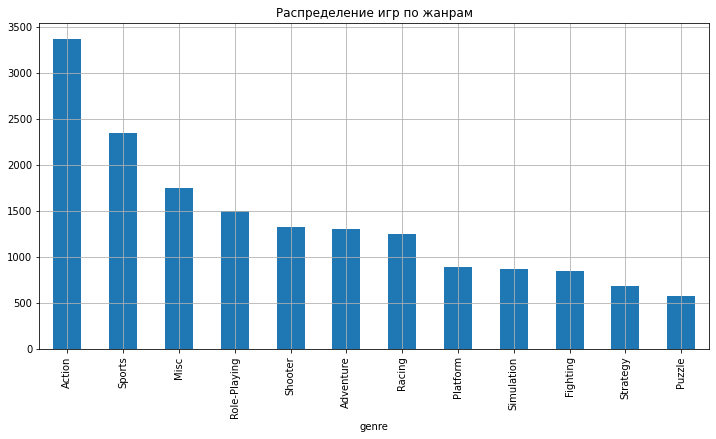

In [12]:
genre_count = df.groupby('genre')['sum_sales'].count().sort_values(ascending=False)
display(genre_count)
genre_count.plot(kind='bar', figsize=(12,6), grid=True, title='Распределение игр по жанрам')

genre
Platform        932173
Shooter         795502
Role-Playing    623871
Racing          583402
Sports          566980
Fighting        527126
Action          517711
Misc            458577
Simulation      446701
Puzzle          418224
Strategy        255095
Adventure       182340
Name: sum_sales, dtype: int64

<AxesSubplot:title={'center':'Распределение игр по медиальным продажам'}, xlabel='genre'>

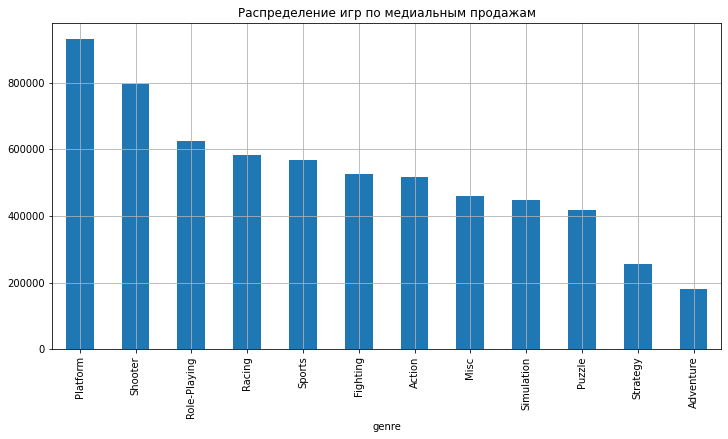

In [13]:
genre_sum_sales = df.groupby('genre')['sum_sales'].mean().astype(int).sort_values(ascending=False)
display(genre_sum_sales)
genre_sum_sales.plot(kind='bar', figsize=(12,6), grid=True, title='Распределение игр по медиальным продажам')

# Вывод:

Самым часто используемым жанром является Action, за все время было выпущено 3369 игр, суммарные продажи по нему почти 1,750 млрд. копий, на втором месте с небольшим отрывом Sports - 2348 игр и 1,33 млрд. копий.

Самые низкие продажи в жанрах Puzzle, Adventure и Strategy.

Самые стабильные продажи с высоким доходом дают игры в жанрах Platform и Shooter.



# 4. Составьте портрет пользователя каждого региона

4.1 Определяем самые популярные платформы (топ-5) по регионам

Топ 5 платформ в регионе NA: platform
X360    140050000
PS4     108739999
PS3     103379998
XOne     93120000
3DS      55309999
Name: na_sales, dtype: int64


<AxesSubplot:title={'center':'Платформы в регионе NA по популярности'}, xlabel='platform'>

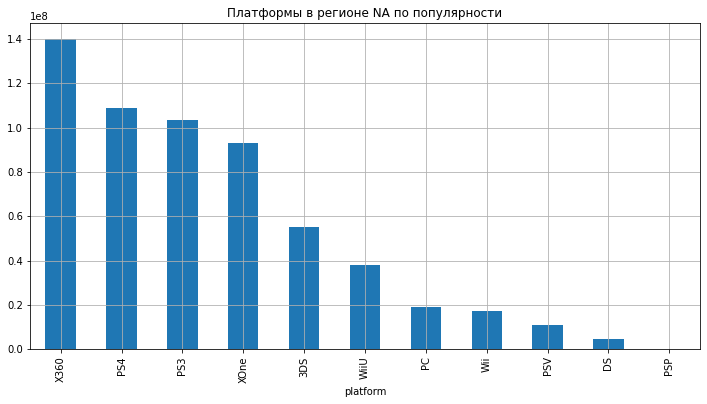

In [14]:
platform_na = df.query('year_of_release > 2011').groupby('platform')['na_sales'].sum().sort_values(ascending=False)
print('Топ 5 платформ в регионе NA:', platform_na.head(5))
platform_na.plot(kind='bar', figsize=(12,6), grid=True, title='Платформы в регионе NA по популярности')

Топ 5 платформ в регионе EU: platform
PS4     141089998
PS3     106860000
X360     74520000
XOne     51589999
3DS      42640000
Name: eu_sales, dtype: int64


<AxesSubplot:title={'center':'Платформы в регионе EU по популярности'}, xlabel='platform'>

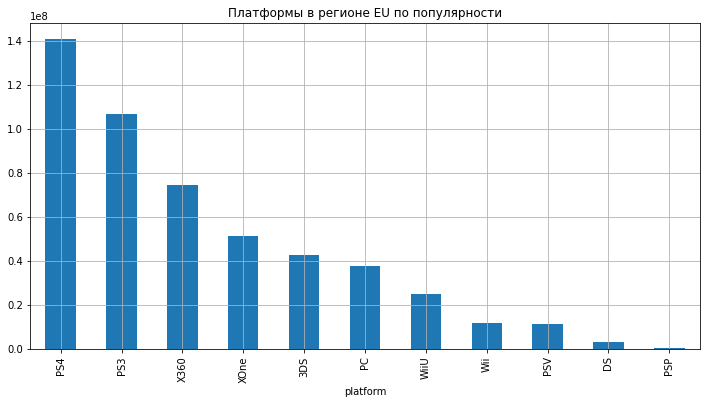

In [15]:
platform_eu = df.query('year_of_release > 2011').groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
print('Топ 5 платформ в регионе EU:', platform_eu.head(5))
platform_eu.plot(kind='bar', figsize=(12,6), grid=True, title='Платформы в регионе EU по популярности')

Топ 5 платформ в регионе JP: platform
3DS     87790000
PS3     35290000
PSV     21040000
PS4     15960000
WiiU    13010000
Name: jp_sales, dtype: int64


<AxesSubplot:title={'center':'Платформы в регионе JP по популярности'}, xlabel='platform'>

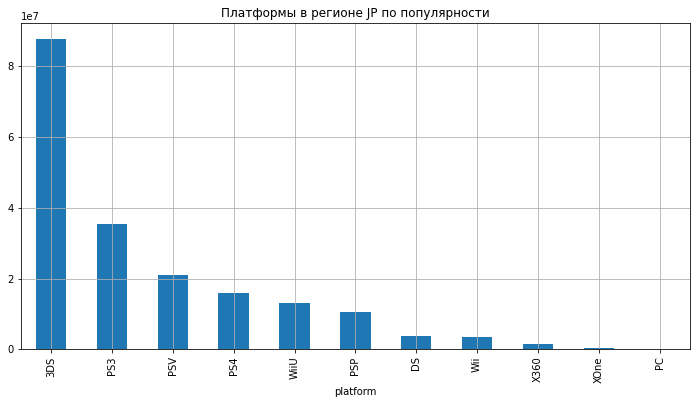

In [16]:
platform_jp = df.query('year_of_release > 2011').groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print('Топ 5 платформ в регионе JP:', platform_jp.head(5))
platform_jp.plot(kind='bar', figsize=(12,6), grid=True, title='Платформы в регионе JP по популярности')

#Вывод:
- В Северной Америке в топ 5 игровых платформ в первую очередь входят платформы местного производства от Microsoft: XOne и X360. Так же в ТОП 5 попали главный конкурент от Sony PS4 и PS3 и замыкает ТОП карманная консоль Nintendo 3DS.

- В Европе ТОП возглавляет приставки от Sony, PS4 и PS3. И два представителя Microsoft X360 и XOne, замыкает топ так же карманная консоль от Nintendo - 3DS.

- В Японии игры исторически появились и набирали популярность раньше, чем в других регионах, ее можно смело назвать родиной современных компьютерных игр, компьютерные игры часть их современной культуры, японец играет всегда и везде. Поэтому наибольшую популярность с огромным отрывом имеют карманные консоли и все местного производства: Nintendo 3DS, PSV и WiiU. Так же в топ попали оба поколения домашних приставок PS3 и PS4.

# 4.2 Определяем самые популярные жанры (топ-5) по регионам

Топ 5 жанров в регионе NA: genre
Action          177839999
Shooter         144769999
Sports           81530000
Role-Playing     64000000
Misc             38189999
Name: na_sales, dtype: int64


<AxesSubplot:title={'center':'Жанры в регионе NA по популярности'}, xlabel='genre'>

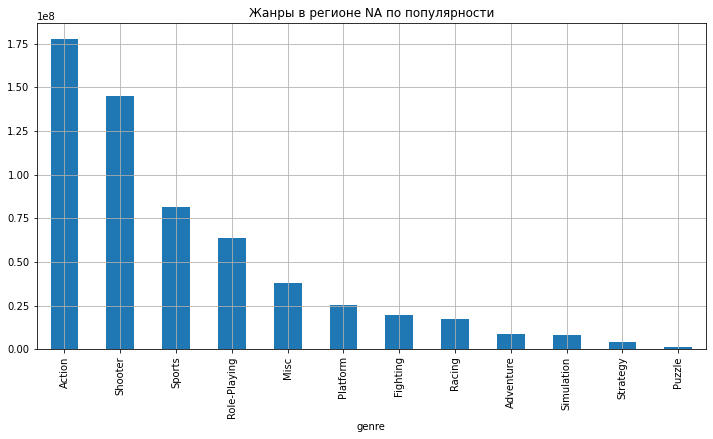

In [17]:
genre_na = df.query('year_of_release > 2011').groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print('Топ 5 жанров в регионе NA:', genre_na.head(5))
genre_na.plot(kind='bar', figsize=(12,6), grid=True, title='Жанры в регионе NA по популярности')

Топ 5 жанров в регионе EU: genre
Action          159339999
Shooter         113469999
Sports           69089999
Role-Playing     48530000
Racing           27290000
Name: eu_sales, dtype: int64


<AxesSubplot:title={'center':'Жанры в регионе EU по популярности'}, xlabel='genre'>

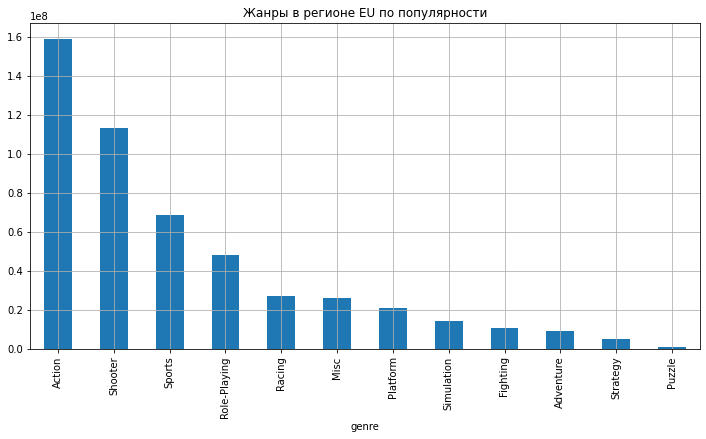

In [18]:
genre_eu = df.query('year_of_release > 2011').groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print('Топ 5 жанров в регионе EU:', genre_eu.head(5))
genre_eu.plot(kind='bar', figsize=(12,6), grid=True, title='Жанры в регионе EU по популярности')

Топ 5 жанров в регионе JP: genre
Role-Playing    65440000
Action          52800000
Misc            12860000
Simulation      10410000
Fighting         9440000
Name: jp_sales, dtype: int64


<AxesSubplot:title={'center':'Жанры в регионе JP по популярности'}, xlabel='genre'>

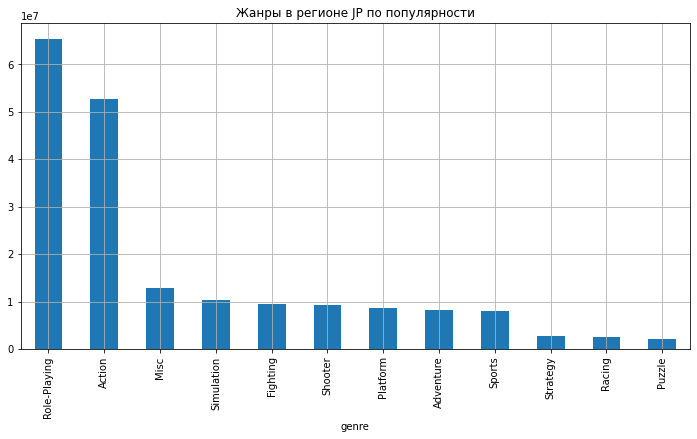

In [19]:
genre_jp = df.query('year_of_release > 2011').groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print('Топ 5 жанров в регионе JP:', genre_jp.head(5))
genre_jp.plot(kind='bar', figsize=(12,6), grid=True, title='Жанры в регионе JP по популярности')

# Вывод:
- ТОП 5 жарнов в Европе и Северной Америке выглядит примерно одинаково: первые четыре места занимают Action, Sport, Shooter, Role-Playing. Замыкают топ с небольшой разницей в Cеверной Америке Misc, в Европе Rasing.

- В Японии с большим отрывом лидируют Role-Playing. Сказывается историческая страсть японцев к ролевым играм. На втором месте и так же с большим отрывом Action. Остальные игры по уровню популярности примерно идентичны. ТОП 5 из них попали Misc, Simulation и Fighting.

# 4.3 Выясняем, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [20]:
esrb_na = df.pivot_table(index = 'rating', values = 'na_sales', aggfunc=['sum'])
esrb_na.columns = ['sum']
display(esrb_na.sort_values('sum', ascending = False))

,sum
rating,
E,1292989991
RP,1240679993
T,759749994
M,748479998
E10+,353319999
EC,4090000
AO,1260000


In [21]:
esrb_eu = df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc=['sum'])
esrb_eu.columns = ['sum']
display(esrb_eu.sort_values('sum', ascending = False))

,sum
rating,
E,710249997
RP,613379999
M,483969997
T,427029997
E10+,188520000
AO,610000
EC,380000


In [22]:
esrb_jp = df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc=['sum'])
esrb_jp.columns = ['sum']
display(esrb_jp.sort_values('sum', ascending = False))

,sum
rating,
RP,841929997
E,198110000
T,151400000
M,64240000
E10+,40200000
EC,1460000
AO,0


В Северной Америке и Европе основные продажи приходятся на семейные игры с рейтингом «Everyone», на втором месте, но с небольшим отрывом игры без рейтинга. На третьем месте с почти двойным отрывом «Teen» 13-17 лет и «Mature» от 17 лет. Игры популярны в основном у подростковой аудитории. Вывод: рейтинг влияет на выбор покупателя, но не всегда. Примерно в 25-30% случаев.

В Японии большая часть продаж, более 61%, приходится на игры без рейтинга. 

Выводы: возрастной рейтинг в Европе и Северной Америке влияет на продажи, только каждый четвертый пользователь покупает игру без рейтинга. В Японии основные продажи приходятся на игры без рейтинга. Можно сделать вывод, что в Японии покупают игры практически не опираясь на рейтинг.



# 5. Проверка гипотез
# 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза о равенстве двух генеральных совокупностей, проверяем по t-критерию Стьюдента.

- Формулируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Нулевая и альтернативная гипотезы сформулированы верно!</div>

In [23]:
user_score_xbox = df[(df['platform'] == 'XOne') & (df['year_of_release'] > 2011) & (df['user_score'] != 0)]['user_score']
user_score_pc = df[(df['platform'] == 'PC') & (df['year_of_release'] > 2011) & (df['user_score'] != 0)]['user_score']

alpha = .05 

results = st.ttest_ind(
    user_score_xbox, 
    user_score_pc)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#проверяем равенство средних генеральных совокупностей "в лоб"
print(round(df[df['platform'] == 'XOne']['user_score'].mean(),2), 'и', round(df[df['platform'] == 'PC']['user_score'].mean(),2)) 

p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу
4.81 и 5.58


# 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Так же гипотеза о равенстве двух генеральных совокупностей, проверяем по t-критерию Стьюдента.

- Формулируем нулевую гипотезу так, чтобы было равенство: Средние пользовательские рейтинги жанров Action и Sports равны
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны


In [24]:
user_score_action = df[(df['genre'] == 'Action') & (df['year_of_release'] > 2011) & (df['user_score'] != 0)]['user_score']
user_score_sports = df[(df['genre'] == 'Sports') & (df['year_of_release'] > 2011) & (df['user_score'] != 0)]['user_score']

alpha = .05 

results = st.ttest_ind(
    user_score_action, 
    user_score_sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#проверяем равенство средних генеральных совокупностей "в лоб"
print(round(df[df['genre'] == 'Action']['user_score'].mean(), 2), 'и', round(df[df['genre'] == 'Sports']['user_score'].mean(),2))

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу
3.83 и 3.27


# Вывод:

Проверка первой гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Гипотезу отвергнуть не удалось, с вероятностью 55% средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверка второй гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Гипотезу отвергнуть не удалось, с большой вероятностью средние пользовательские рейтинги жанров Action и Sports разные.



# Общий вывод:
В ходе исследования мы проведи анализ данных, выявили и исправили ряд ошибок, преобразовали данные:

- Пропуски в столбце Name. Всего два, не ясно, о какой игре идет речь. Удаляем.

- Пропуски в столбце Genre. Всего два. Удаляем.

- Пропуски в столбце "Year_of_Release" - 269 шт., это 1,6% датафрейма. Количество незначительно, но оно может повлиять на исследование, если заполнять средним или медиальным значением. Для отдельного года это может даль смещение. Заполним нулями и не будем использовать при исследовании года выпуска. Можно преобразовать столбец в тип DateTame, но нет уверенности, что это поможет исследованию, так как в столбце только год и с ним можно провести все необходимые арифметические действия.

- Пропуски в столбцах Critic_Score - 8578 шт. и User_Score - 6701 шт., говорят, что эти игры не были оценены критиками/пользователями. Использовать эти игры в исследованиях по данным столбцам нет смысла. Так же в столбце User_Score есть значения "tbd" - "To Be Determined" - рейтинг на стадии определения, 2424 значения. Все заменяем на 0 и будем исключать в процессе исследования.

- Пропуски в столбце Rating. Речь идет о возрастном рейтинге ESRB. Система рейтинга была запущена только в 1994 году, играм до этого времени рейтинг присвоен не был. Этим пропускам можно присвоить рейтинг RP (рейтинг ожидается) и не использовать в исследовании. Игр с рейтингом «EC» («Early childhood») — «Для детей младшего возраста», K-A ("EC" до 1999 года) и «AO» («Adults Only 18+») — «Только для взрослых» в сумме очень мало, 0.06% датафрейма. Их так же нет смысла использовать в исследовании рейтинга. Пока оставим, возможно удалим позже исходя из задачи. Преобразуем рейтинг "K-A" в "EC".

Смена типов данных:

- Year_of_Release преобразуем в int.

- Значения столбцов NA_sales, EU_sales, JP_sales, Other_sales вписаны в млн. шт.. Для перевода в int можно сначала преобразовать в единицы (Прим: 2,1 млн = 2 100000). Если данных слишком мног0, можно преобразовать в тысячи (Прим: 2,1 млн = 21000 тыс.).

- Critic_Score переводим в int

- User_Score переводим в float. Можно домножить на 10 и перевести в int, для удобства сравнения с Critic_Score, но это нарушит "систему исчисления" данного рейтинга по 10-бальной шкале. Сделаем, если понадобится далее для анализа и сравнения.

# Определили интересующий нас период исследования:
- Для построения прогноза на 2017 год лучше выбрать период стабильной стагнации с 2012 до 2016 года. Это отсеет значительное количество не актуальных платформ и даст информацию, соответствующую времени.

# Оценили динамику продаж по платформам в исследуемый период:

- Самыми перспективными платформами для продажи можно считать PS4, XOne, два конкурирующих гиганта имеют в перспективе рост продаж в среднем в течение 5 лет. 

- Персональные компьютеры (PC) выбиваются из тенденции "поддержка в течение 5 лет", продажи по ним стабильно высокие в весь период исследования. Так как персональные компьютеры не продаются готовым продуктом, как консоль, а модульно собираются и обновляются пользователями, эта платформа актуальна постоянно. 

- Так же отдельно стоит обратить внимание на рынок мини консолей WiiU и PSV, объем продаж по ним ниже, но это отдельный перспективный рынок.

# Построили и исследовали график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

- Самые большие межквартильный размах и медиана у платформ NES (в РФ - приставка Dendy) и GB (GameBoy). Так же высокий межквартильный размах у платформы GEN (Sega Mega Drive). Все три платформы уже не поддерживаются, но к их показателям стоит стремится при планировании продаж.

- У всех платформ диаграмма скошена вправо и имеется большое количество выбросов вправо. Вероятно из-за тендеции, что игры имеют свойство "вируситься" и топовые игры покупают себе большинство пользователей платформы.

- Было бы интересно оценить статистику, сколько игр за время пользования платформой в среднем покупает каждый пользователь.

- В остальном межквартальный размах у большинства платформ находятся в интервале 100 000 - 700 000, медиана 250 000 - 300 000. 

- Не верным будет проводить параллель между платформами, поддержка которых завершена и поддерживаемыми на 2016 год. PS4, XOne по межквартальному размаху и медиане сравнимы с другими платформами, но эти продажи они набрали за 5 лет из 10, а значит имеют перспективу вырасти еще вдвое.

# Оценили, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков.

- Коэффициаент корреляции между рейтингом критиков и суммарными продажами положительный, но низкий, 0.407. Между рейтингом пользователей и продажами практически нулевой и даже отрицательный, -0.034.

- Вероятно на факт продажи влияют другие показатели: реклама, доверие к компании производителю, пристрастие к жанру итп. Есть тенденция о недоверии к любым оценкам в связи с их обильной "покупкой" и "накруткой".

- Так же вероятно, что игры покупаются в основном по предзаказу либо непосредственно после выпуска и принимают решение о продаже не по рейтингу игры, а по подготовительным мероприятиям: рекламе и промо компаниям.

- Критикам игра достается раньше, чем пользователям, что по сути является промо акцией. И на данные рейтинга пользователи успевают опереться до покупки.

- Хочешь продать игру - занимайся прогревом и промо акциями.

# Оценили общее распределение игр по жанрам

- Самым прибыльным жанром является Action, за все время было выпущено 3369 игр, суммарные продажи по нему почти 1,750 млрд. копий, на втором месте с небольшим отрывом Sports - 2348 игр и 1,33 млрд. копий.

- Самые низкие продажи в жанрах Puzzle, Adventure и Strategy.

# Определили ТОП5 платформ по регионам:

- В Северной Америке в топ 5 игровых платформ в первую очередь входят платформы местного производства от Microsoft: XOne и X360. Так же в ТОП 5 попали главный конкурент от Sony PS4 и PS3 и замыкает ТОП карманная консоль Nintendo 3DS.

- В Европе ТОП возглавляет приставки от Sony, PS4 и PS3. И два представителя Microsoft X360 и XOne, замыкает топ так же карманная консоль от Nintendo - 3DS.

- В Японии игры исторически появились и набирали популярность раньше, чем в других регионах, ее можно смело назвать родиной современных компьютерных игр, компьютерные игры часть их современной культуры, японец играет всегда и везде. Поэтому наибольшую популярность с огромным отрывом имеют карманные консоли и все местного производства: Nintendo 3DS, PSV и WiiU. Так же в топ попали оба поколения домашних приставок PS3 и PS4.

# Определили ТОП5 жанров по регионам:

- ТОП 5 жарнов в Европе и Северной Америке выглядит примерно одинаково: первые четыре места занимают Action, Sport, Shooter, Role-Playing. Замыкают топ с небольшой разницей в Cеверной Америке Misc, в Европе Rasing.

- В Японии с большим отрывом лидируют Role-Playing. Сказывается историческая страсть японцев к ролевым играм. На втором месте и так же с большим отрывом Action. Остальные игры по уровню популярности примерно идентичны. ТОП 5 из них попали Misc, Simulation и Fighting.

# Выячнили, как влияет возрастной рейтинг на продажи по регионам:

- В Северной Америке и Европе основные продажи приходятся на семейные игры с рейтингом «Everyone», на втором месте, но с небольшим отрывом игры без рейтинга. На третьем месте с почти двойным отрывом «Teen» 13-17 лет и «Mature» от 17 лет. Игры популярны в основном у подростковой аудитории. Вывод: рейтинг влияет на выбор покупателя, но не всегда. Примерно в 25-30% случаев.

- В Японии большая часть продаж, более 61%, приходится на игры без рейтинга. 

- Выводы: возрастной рейтинг в Европе и Северной Америке влияет на продажи, только каждый четвертый пользователь покупает игру без рейтинга. В Японии основные продажи приходятся на игры без рейтинга. Можно сделать вывод, что в Японии покупают игры практически не опираясь на рейтинг.

# Проверили гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
Гипотеза не подтвердилась.

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») разные. 
Гипотеза не подтвердилась.

# Вывод из вывода, рекомендации отделу маркетинга:

- Потенциально перспективными платформами для регионов NA и EU являются PS4 и XOne, для региона JP - PS4.
- Перспективными жанрами в регионаз NA и EU являются Action, Sport, Shooter, Role-Playing, в JP - Role-Playing и Action.
- В Японии возрастной рейтинг игры для продаж значения не имеет.